## Observations and Insights

## Dependencies and starter code

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
print(mouse_metadata)
print(study_results)
combined_data = pd.merge(mouse_metadata,study_results,how = 'outer',on="Mouse ID")
print(combined_data.head(20))

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

## Summary statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Make a dataframe of regimen and tumor volume
#Group by the regimen and get the count for each volume 
#Get the statistics from the different regimens
#Store them into a summmary dataframe

tumor_data = combined_data[["Drug Regimen","Tumor Volume (mm3)"]]
regimen_group = tumor_data.groupby("Drug Regimen")
regimen_count = regimen_group["Drug Regimen"].count()
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
print(regimen_mean)
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
print(regimen_median)
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
print(regimen_var)
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
print(regimen_std)
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()
print(regimen_sem)

summary_df =pd.DataFrame({"Mean":regimen_mean,"Median":regimen_median,"Variance":regimen_var,"St. Dev":regimen_std,"Standard Error":regimen_sem})
summary_df

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

,Mean,Median,Variance,St. Dev,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

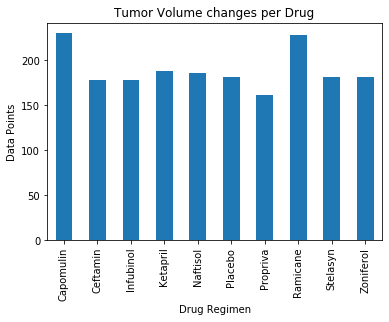

<Figure size 432x288 with 0 Axes>

In [134]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Use the previously made dataframes for each regimen to get the name of each regimen, and the number of data points
#Use regimen as the x-axis of the plot, number of data points as the y-axis label
#Using DataFrame.plot(), plot the regimen vs the data points

regimen_chart = regimen_count.plot(kind = "bar")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Data Points")
regimen_chart.set_title("Tumor Volume changes per Drug")

#Add more room on the axes, make the graph look prettier


plt.show()
plt.tight_layout()

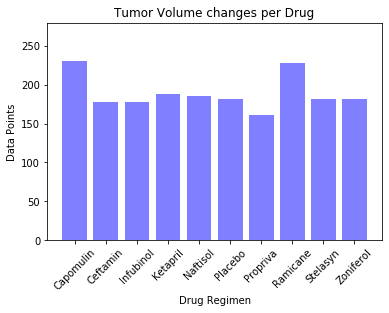

<Figure size 432x288 with 0 Axes>

In [135]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Store the regimen names and data points per regimen in their own separate variables
#Use pyplot to make the bar chart
#Label the chart the same as the other one

x_axis = np.arange(len(regimen_count))
plt.bar(x_axis,regimen_count,color="b",alpha = .5,align ="center")
tick_locations = [value for value in x_axis]
drug_axis = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations,drug_axis,rotation = 45)

plt.ylim(0,max(regimen_count)+50)
plt.title("Tumor Volume changes per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()



## Pie plots

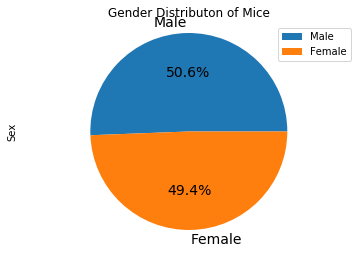

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Make a dataframe of the data looking at the gender of the mice
#Using DataFrame.plot(), make a pie chart of female vs male mice
gender_df = combined_data["Sex"].value_counts()

gender_df.plot(kind = "pie", legend = True, title = "Gender Distributon of Mice",autopct='%1.1f%%',fontsize = 14)
plt.axis('equal')
plt.show()

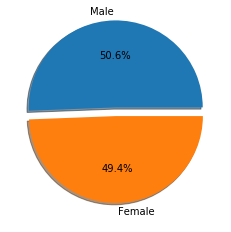

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Get the total number of male mice and female mice, and store them in a list
#Store the gender names in a list
#Use pyplot to make the pie chart
explode = (.1,0)
label = ["Male","Female"]

plt.pie(gender_df,explode=explode,labels=label,autopct="%1.1f%%",shadow=True,startangle=0)
plt.show()

## Quartiles, outliers and boxplots

In [138]:
###### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Create four dataframes of just the top drugs
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] =="Capomulin"]
ramicane_data = combined_data.loc[combined_data["Drug Regimen"] =="Ramicane"]
infubinol_data = combined_data.loc[combined_data["Drug Regimen"] =="Infubinol"]
ceftamin_data = combined_data.loc[combined_data["Drug Regimen"] =="Ceftamin"]


fin_capomulin_data = capomulin_data.loc[capomulin_data["Timepoint"] ==45]
fin_ramicane_data = ramicane_data.loc[ramicane_data["Timepoint"] ==45]
fin_infubinol_data = infubinol_data.loc[infubinol_data["Timepoint"] ==45]
fin_ceftamin_data = ceftamin_data.loc[ceftamin_data["Timepoint"] ==45]
print(fin_capomulin_data["Tumor Volume (mm3)"])
print(fin_ramicane_data["Tumor Volume (mm3)"])
print(fin_infubinol_data["Tumor Volume (mm3)"])
print(fin_ceftamin_data["Tumor Volume (mm3)"])
quartiles_cap = fin_capomulin_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_ram = fin_ramicane_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_inf = fin_infubinol_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_cef = fin_ceftamin_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq_cap = quartiles_cap[.25]
upperq_cap = quartiles_cap[.75]
iqr_cap = upperq_cap - lowerq_cap

lowerq_ram = quartiles_ram[.25]
upperq_ram = quartiles_ram[.75]
iqr_ram = upperq_ram - lowerq_ram

lowerq_inf = quartiles_inf[.25]
upperq_inf = quartiles_inf[.75]
iqr_inf = upperq_inf - lowerq_inf

lowerq_cef = quartiles_cef[.25]
upperq_cef = quartiles_cef[.75]
iqr_cef = upperq_ram - lowerq_cef

print("Drug Regimen Capomulin:")
print(f"The lower quartile of the final volume is: {lowerq_cap}")
print(f"The upper quartile of the final volume is: {upperq_cap}")
print(f"The interquartile range of the final volume is: {iqr_cap}")
print(f"The median of final volume is: {quartiles_cap[0.5]}")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers")
print(f"Values above {upper_bound_cap} could be outliers\n")

print("Drug Regimen Ramicane:")
print(f"The lower quartile of the final volume is: {lowerq_ram}")
print(f"The upper quartile of the final volume is: {upperq_ram}")
print(f"The interquartile range of the final volume is: {iqr_ram}")
print(f"The median of final volume is: {quartiles_ram[0.5]} ")

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers")
print(f"Values above {upper_bound_ram} could be outliers\n")
      
print("Drug Regimen Infubinol:")      
print(f"The lower quartile of the final volume is: {lowerq_inf}")
print(f"The upper quartile of the final volume is: {upperq_inf}")
print(f"The interquartile range of the final volume is: {iqr_inf}")
print(f"The median of final volume is: {quartiles_inf[0.5]} ")

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers")
print(f"Values above {upper_bound_inf} could be outliers\n")

print("Drug Regimen Ceftamin:")      
print(f"The lower quartile of the final volume is: {lowerq_cef}")
print(f"The upper quartile of the final volume is: {upperq_cef}")
print(f"The interquartile range of the final volume is: {iqr_cef}")
print(f"The median of final volume is: {quartiles_cef[0.5]} ")

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} could be outliers")
print(f"Values above {upper_bound_cef} could be outliers\n")


19     23.343598
29     28.484033
39     28.430964
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.455298
204    37.311846
224    36.041047
244    37.074024
282    38.846876
299    38.939633
309    38.982878
337    38.125164
350    40.658124
360    40.159220
370    40.728578
380    41.483008
390    41.581521
440    47.685963
Name: Tumor Volume (mm3), dtype: float64
9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
272    37.311236
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
Name: Tumor Volume (mm3), dtype: float64
463     67.973419
473     65.525743
540     66.083066
637     72.226731
800     62.435404
834     60.918767
1053    66.196912
1813    67.685569
1872    62.754451
Name: Tumor Volume (mm3), dtype: float64
493     62.999356


# Old Data
#Combine the dataframes into one
top_drugs = capomulin_data.append(ramicane_data)
top_drugs = top_drugs.append(infubinol_data)
top_drugs = top_drugs.append(ceftamin_data)

#Get the relevant data to be used
top_drugs = top_drugs[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
print(top_drugs)

#grouped_top_drugs = top_drugs.groupby(['Mouse ID','Drug Regimen'])
#final_volumes = grouped_top_drugs["Tumor Volume (mm3)"].last()
final_volumes = top_drugs.loc[top_drugs["Timepoint"] == 45]
print(final_volumes)
#quartiles = final_volumes.quantile([.25,.5,.75])
quartiles = final_volumes["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of the final volume is: {lowerq}")
print(f"The upper quartile of the final volume is: {upperq}")
print(f"The interquartile range of the final volume is: {iqr}")
print(f"The median of final volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

outlier = False
for x in final_volumes["Tumor Volume (mm3)"]:
    if (x < lower_bound) | (x > upper_bound):
        print(f"{x} is an outlier")
        outlier = True
if outlier == False:
    print("There are no outliers.")
    
outliers = final_volumes.loc[(final_volumes["Tumor Volume (mm3)"] < lower_bound) | (final_volumes["Tumor Volume (mm3)"] > upper_bound)]
outliers
#final_volumes = final_volumes["Tumor Volume (mm3)"]
#final_volumes
#final_volume = grouped_data["Tumor Volume (mm3)"].last()
#final_volume

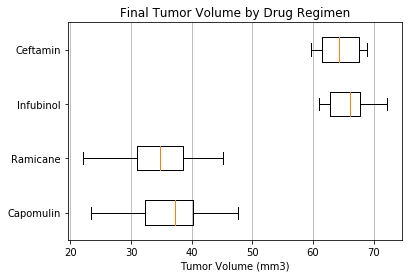

In [139]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Add labels to box plot
vols_cap = fin_capomulin_data["Tumor Volume (mm3)"]
vols_ram = fin_ramicane_data["Tumor Volume (mm3)"]
vols_inf = fin_infubinol_data["Tumor Volume (mm3)"]
vols_cef = fin_ceftamin_data["Tumor Volume (mm3)"]

plt.boxplot([vols_cap, vols_ram,vols_inf,vols_cef],vert=False)

plt.title("Final Tumor Volume by Drug Regimen")
plt.xlabel("Tumor Volume (mm3)")
plt.yticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.grid(axis="x",linestyle="-",which="both")

plt.show()

## Line and scatter plots

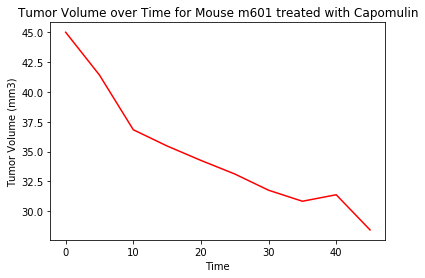

In [140]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df = capomulin_data.loc[capomulin_data["Mouse ID"] == "m601"]
mouse_df = mouse_df[["Timepoint","Tumor Volume (mm3)"]]
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"], color = "r")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time for Mouse m601 treated with Capomulin")
plt.show()

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64


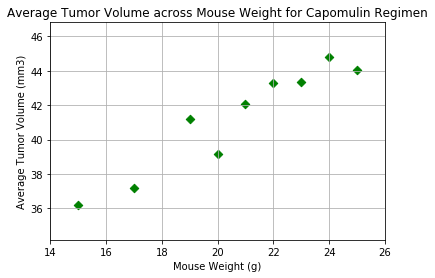

In [141]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Group Cap dataframe by mouse weight and use mean() to find the average tumor volume for each weight
mouse_weight = capomulin_data.groupby("Weight (g)")
mouse_mean = mouse_weight["Tumor Volume (mm3)"].mean()
print(mouse_mean)

#Get the unique weights and sort them in ascending order
x_axis = sorted(capomulin_data["Weight (g)"].unique())

#Make scatter plot
plt.scatter(x_axis,mouse_mean,color = "g",marker = "D")
plt.title("Average Tumor Volume across Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(mouse_mean.min()-2,mouse_mean.max()+2)
plt.xlim(x_axis[0]-1,x_axis[len(x_axis)-1]+1)
plt.grid()
plt.show()

The correlation between mouse weight and average tumor volume is 0.95.
The line of best fit for the correlation is y = 0.89x + 22.76


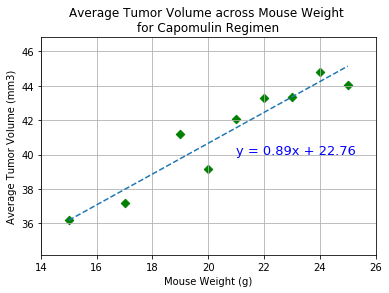

In [182]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(x_axis,mouse_mean)
print(f"The correlation between mouse weight and average tumor volume is {round(corr[0],2)}.")

#weights = [float(i) for i in x_axis]
#print(weights)
#mouse_mean = mouse_mean.astype(float)
#print(mouse_mean)

#Use linregress to get linear regression model data
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,mouse_mean)
#print(f"{slope} {intercept} {rvalue} {pvalue} {stderr}")

#Get the values to plot line of best fit, storing them in a list
regress_values = []
for x in x_axis:
    regress_values.append((x * slope) + intercept)

#print(regress_values)
#Make line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit for the correlation is {line_eq}")

#Print the linear regression on the scatter plot
plt.scatter(x_axis,mouse_mean,color = "g",marker = "D")
plt.title("Average Tumor Volume across Mouse Weight \nfor Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(mouse_mean.min()-2,mouse_mean.max()+2)
plt.xlim(x_axis[0]-1,x_axis[len(x_axis)-1]+1)
plt.grid()
plt.plot(x_axis,regress_values,"--")
plt.annotate(line_eq,(21,40),color = "b",fontsize = 13)
plt.show()